<a href="https://colab.research.google.com/github/alullis/hackathon/blob/master/Monthly_report_Lead_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando biblioteca essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, timedelta

#se conectando com os dados
dataset = pd.read_csv('/Agile Jira 2021-08-02T12_50_09+0000.csv',';')
dataset_ordered = dataset.sort_values(['Custom field (Start_Date)'])


In [2]:
issue = dataset_ordered['Issue key']


In [3]:
def calcula_numero_dias_uteis (date_teste_1,date_teste_2 ):
  td = timedelta (days = 1)
  dias_uteis = 0
  while date_teste_1 < date_teste_2+td:
    if date_teste_1.weekday() not in (5,6):
      dias_uteis += 1;

    date_teste_1 = date_teste_1 + td

  return dias_uteis 
   



In [4]:
days_to_complete_list_by_one = []
total_days = 0

for issue_by_one, startdate_by_one, enddate_by_one in zip(dataset_ordered['Issue key'], dataset_ordered['Custom field (Start_Date)'], dataset_ordered['Custom field (End_Date)']):
  date1 = datetime.strptime(startdate_by_one, '%Y-%b-%d %I:%M %p').date()
  date2 = datetime.strptime(enddate_by_one, '%Y-%b-%d %I:%M %p').date()
  days_to_complete = calcula_numero_dias_uteis(date1, date2)
  days_to_complete_list_by_one.append (days_to_complete)
  total_days = total_days + days_to_complete
    

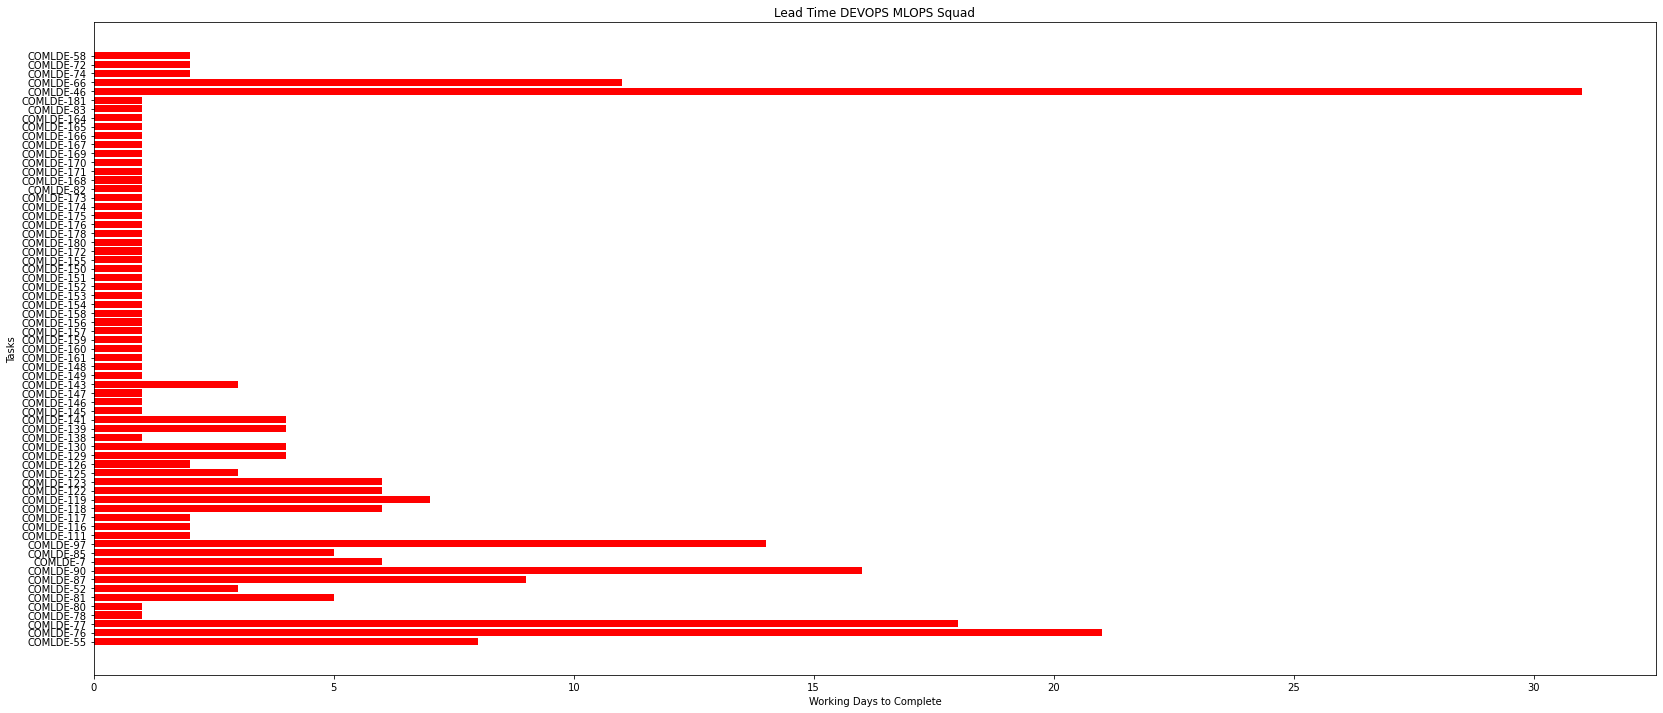

Dados Consolidados:
 - Número de Tarefas Entregues:  67

Recomendamos que para alinhar datas com clientes internos, deve-se levar em conta que 75 % das tarefas, tem sido resolvidas em até 4.0 dias úteis.


In [11]:
#informar percentil desejado
percentil = 75

plt.figure(figsize=(28,12))
plt.title('Lead Time DEVOPS MLOPS Squad')
plt.xlabel('Working Days to Complete')
plt.ylabel('Tasks')
plt.barh(issue,days_to_complete_list_by_one, color="red", visible="true", )
plt.plot()
plt.show()

print("Dados Consolidados:")
print(" - Número de Tarefas Entregues: ", len(dataset_ordered))
#print(" - Tempo Médio em dias úteis de entrega das tarefas: ", math.trunc(total_days/(len(dataset_ordered))))
print("\nRecomendamos que para alinhar datas com clientes internos, deve-se levar em conta que", percentil,"% das tarefas, tem sido resolvidas em até",np.percentile(days_to_complete_list_by_one, percentil),"dias úteis.")

# Nova seção